* * *
<pre> NYU Paris            <i> Machine Learning - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab: Dimension Reduction </h1>

<pre align="left"> June 13th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goals:
- Understand PCA deeply and see when it can be useful or not
- Evaluate other dimension reduction methods

In [68]:
import numpy as np
from matplotlib import pyplot as plt

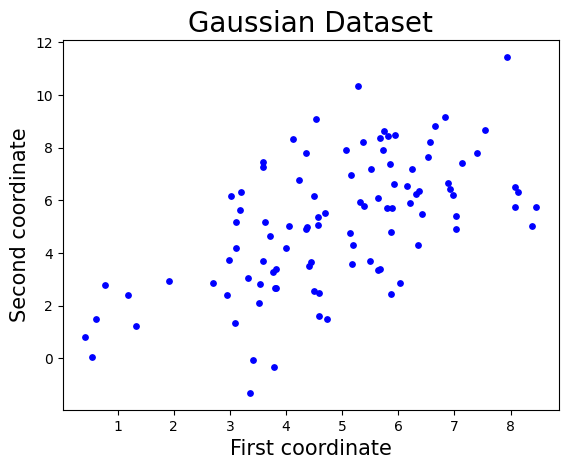

In [69]:
# Sample one dataset with (correlated) Gaussian distribution
np.random.seed(0)

# Size of data
n_samples = 100
n_dim = 2

# Mean vector of the dataset
mean = 5 *  np.ones(n_dim)

# Sample covariance matrix from a Wishart distribution
temp = np.random.randn(n_dim, n_dim)
cov = temp@temp.T

X = np.random.multivariate_normal(mean, cov, size=n_samples)

plt.scatter(X[:, 0], X[:, 1], s=15, c='b')
plt.xlabel('First coordinate', size=15)
plt.ylabel('Second coordinate', size=15)
plt.title('Gaussian Dataset', size=20)
plt.show()

### Question 1:

Implement your own PCA algorithm.

In [70]:
class MyPCA(object):

    def __init__(self, n_components):
        self.n_components = n_components


    def fit(self, X):
        cov_matrix = np.cov(X.T)
        eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

        #sort the eigenvalues in descending order
        indices = np.arange(0,len(eigen_values))
        sorted_index = ([x for _,x in sorted(zip(eigen_values, indices))])[::-1]

        self.eigenvalues = eigen_values[sorted_index]
        #similarly sort the eigenvectors
        self.eigenvectors = eigen_vectors[:,sorted_index]
        self.eigenvector_subset = self.eigenvectors[:self.n_components]


    def transform(self, Z):
        return np.dot(Z, self.eigenvectors.T)

### Question 2

Apply PCA on the Gaussian dataset

In [71]:
pca = MyPCA(2)
pca.fit(X)
X_tr = pca.transform(X)

### Question 3

Verify that your transformed data are decorrelated. What do you observe?

In [72]:
np.cov(X_tr.T)

array([[ 7.78619202e+00, -1.46523087e-15],
       [-1.46523087e-15,  1.67113936e+00]])

values, that are not on diagonal (-1.46523087e-15) are very close to zero. so there is no correlation between two features.

### Question 4

Visualize your transformed data after PCA.

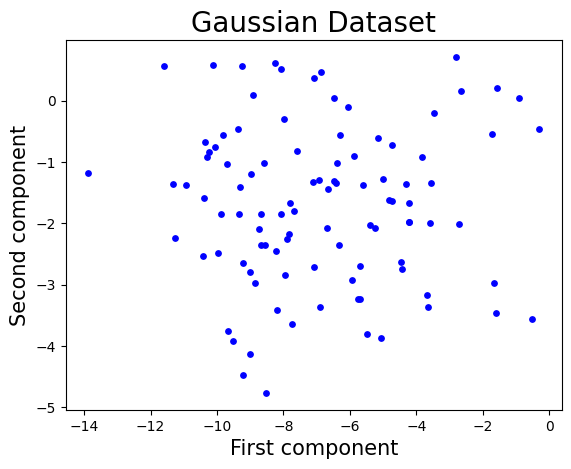

In [73]:
plt.scatter(X_tr[:, 0], X_tr[:, 1], s=15, c='b')
plt.xlabel('First component', size=15)
plt.ylabel('Second component', size=15)
plt.title('Gaussian Dataset', size=20)
plt.show()

visually we also confirm that data is decorrelated

### Question 4bis

Visualize PCA components in your original orthornormed reference frame (Plot the data, and the components-axes).

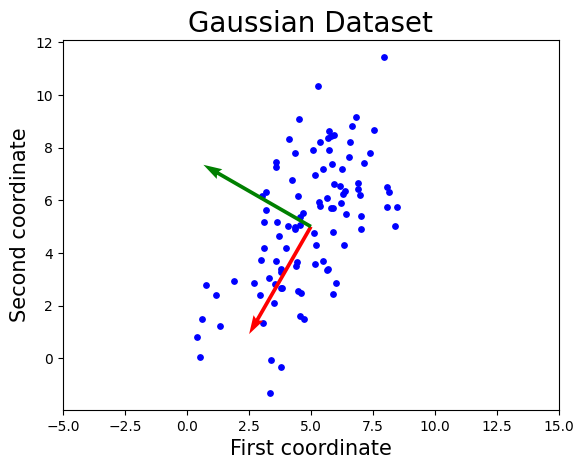

In [74]:
origin = np.array([[5, 5],[5, 5]])
V = pca.eigenvectors

plt.scatter(X[:, 0], X[:, 1], s=15, c='b')
plt.quiver(*origin, V[:,0], V[:,1], color=['r','g'], scale=4)
plt.xlabel('First coordinate', size=15)
plt.ylabel('Second coordinate', size=15)
plt.title('Gaussian Dataset', size=20)
plt.xlim(-5, 15)
plt.show()

### Question 5

Compare your algorithm with the one in sklearn. You can check the covariance matrix of the transformed data. Is this the same than yours? What do you observe?

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca2 = PCA(2)
pca2.fit(X)
X_tr2 = pca2.transform(X)
print(np.cov(X_tr2.T))

[[7.78619202e+00 6.64523726e-17]
 [6.64523726e-17 1.67113936e+00]]


the values on the diagonal are the same. however values not on the diagonal are different (my -1.46523087e-15 vs sklearn's 6.64523726e-17).
so sklearn decorrelated the data more.

### Bonus Question

Compare the computational time of both algorithms, what do you observe? Why?

In [77]:
import time

### Question 6

Let's apply the PCA on a (easy) classification real-world dataset. Apply PCA with 2 components and visualize the dataset with different colors for each class.

In [78]:
from sklearn import datasets

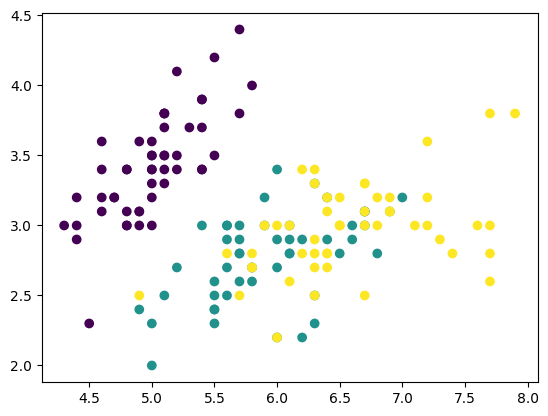

In [79]:
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target

plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
plt.show()

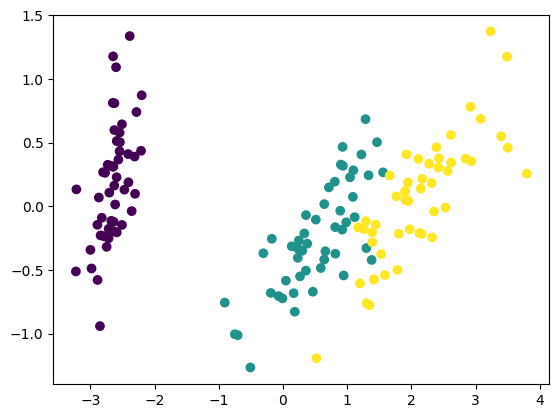

In [80]:
sklearn_PCA = PCA(2)
sklearn_PCA.fit(X_iris)
X_pca = sklearn_PCA.transform(X_iris)
plt.scatter (X_pca[:,0], X_pca[:,1], c=y_iris)
plt.show()

### Question 7

Use a KNN algorithm and perform it on the dataset. Use different combinations of parameters using the GridSearchCV function.

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
parameters = {"n_neighbors": [1,3,5,7,9,11]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_iris, iris.target)

print(clf.best_estimator_)
print(clf.best_score_)

KNeighborsClassifier(n_neighbors=7)
0.9800000000000001


### Question 8

Use a PCA first and then apply again the classification algorithm. Observe the best score, is the PCA improve the results? Which explanation can you give?

In [83]:
pca3 = PCA(2)
X_iris_pca = pca3.fit_transform(X_iris)
knn2 = KNeighborsClassifier()
clf2 = GridSearchCV(knn2, parameters)
clf2.fit(X_iris_pca, iris.target)

print(clf2.best_estimator_)
print(clf2.best_score_)

KNeighborsClassifier(n_neighbors=3)
0.9666666666666668


Applying a PCA with 2 components decreased the accuracy by a little bit. Still some information (variance) was missed during transform, so that's why the score decreased.

### Question 9

How features influence the first components (in term of variance)? You can answer this question by inspecting the weights in the first component.

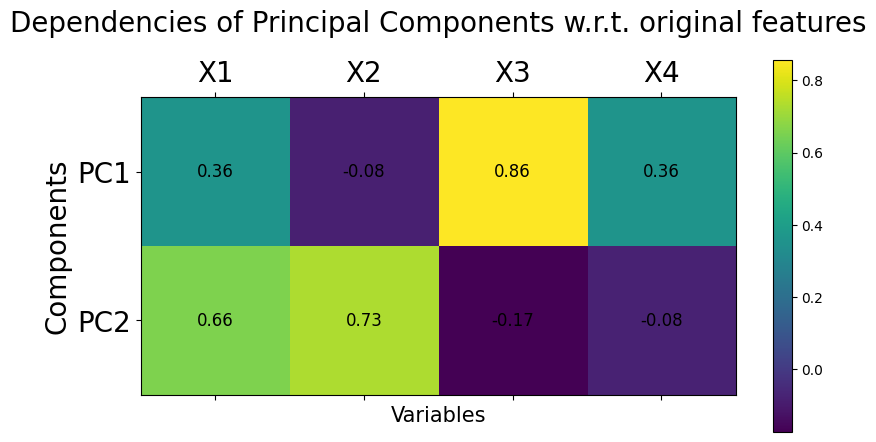

In [84]:
plt.matshow(pca3.components_)
plt.ylabel('Components', size=20)
plt.xlabel('Variables', size=15)
for i in range(4):
    for j in range(2):
        plt.text(i, j, "%0.2f" % pca3.components_[j, i], size=12, color='black', ha="center", va="center")
plt.colorbar()
xlabels = ['X1', 'X2', 'X3', 'X4']
plt.xticks(range(4), xlabels, size=20)
ylabels = ['PC1', 'PC2']
plt.yticks(range(2), ylabels, size=20)
plt.title('Dependencies of Principal Components w.r.t. original features', size=20, pad=20)
plt.show()

In [85]:
import pandas as pd
df_describe = pd.DataFrame(X_iris)
df_describe.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We see that variable X3 has the most variance (std=1.76), and has the most weight in the first PCA component. Second most weight got X1 and X4, which have std=0.82 and std=0.76. And the component with lowest variance has weight close to 0.

### Bonus Question

Create a pipeline with KNN, classification trees, RandomForest and SVM. Perform the Question 7/8 for these 4 classifiers. What do you observe?

### Question 10

Time to apply PCA on a high dimensional dataset.

In [86]:
from sklearn.datasets import load_digits
digits = load_digits()
X_d = digits.data
y_d = digits.target

print(X_d.shape)

(1797, 64)


### Question 11

Now, you will have to reduce the dimension. The main question is: how to choose the number of components?


Perform a PCA with a high number of components and inspect the explained variance. Which number of components do you suggest?

In [87]:
pca_d = PCA(30)
X_d_tr = pca_d.fit_transform(X_d)
exp_var_pca = pca_d.explained_variance_ratio_

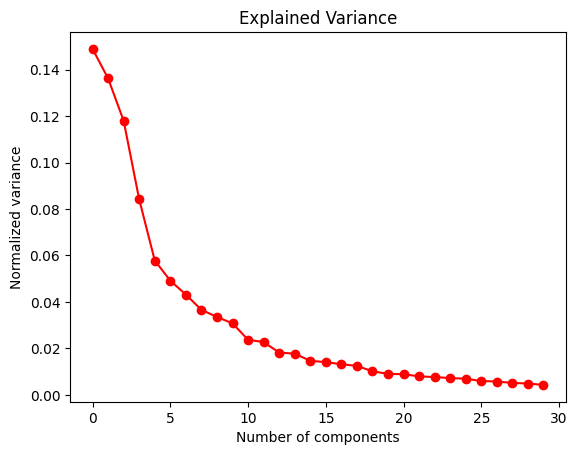

In [88]:
plt.plot(range(0,len(exp_var_pca)), exp_var_pca, marker='o', c='r')
plt.title('Explained Variance')
plt.ylabel('Normalized variance')
plt.xlabel('Number of components')
plt.show()

I would suggest to choose 15 components

In [89]:
pca_d = PCA(15)
X_d_tr = pca_d.fit_transform(X_d)

### Question 12

Run PCA on the handwritten digits data reducing its dimension from 64 to 2. Visualise digits in dimension two. Is dimension two seems enough to represent keep information of data?

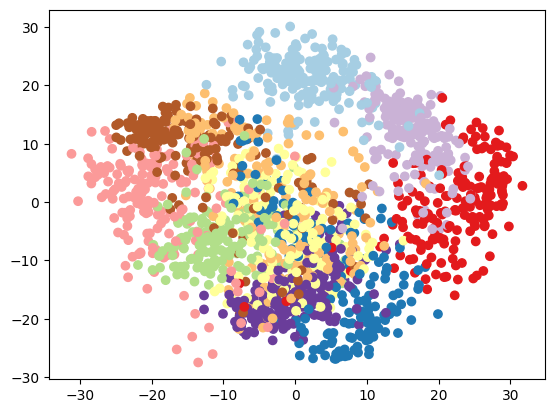

In [90]:
from matplotlib import cm

pca_2d = PCA(2)
vis = pca_2d.fit_transform(X_d)
# vis = # to do
colors = cm.Paired(np.linspace(0., 1., 10)) # list of 10 colors

colors_all = colors[digits.target]
plt.scatter(vis[:, 0], vis[:, 1], c=colors_all)
plt.show()

Definitely not enough. Even though digits are clustered as clouds, they overlap.

### Question 13

Perform a KNN algorithm on the raw data and on the projected data. What do you observe in terms of accuracy?

In [91]:
knn_raw = KNeighborsClassifier()
clf = GridSearchCV(knn_raw, parameters)
clf.fit(X_d, digits.target)

print("Raw data")
print(clf.best_estimator_)
print(clf.best_score_)

knn_proj = KNeighborsClassifier()
clf = GridSearchCV(knn_proj, parameters)
clf.fit(X_d_tr, digits.target)

print("Projected data")
print(clf.best_estimator_)
print(clf.best_score_)

Raw data
KNeighborsClassifier(n_neighbors=3)
0.966621788919839
Projected data
KNeighborsClassifier(n_neighbors=3)
0.9571634168987929


as expected, accuracy decreased, but only for 1%. This is good result, considering that we decreased number of features in around 4 times.

### Bonus Question

Apply other reduction dimension methods such as Kernel PCA (choose one kernel), Independant Component Analysis (ICA) and t-SNE. Visualize their projection in dimension two.

In [92]:
from sklearn.decomposition import FastICA, PCA, KernelPCA
from sklearn.manifold import TSNE